#   1.Разбиение на тестовую и обучающую выборку в Python

# Проверка сбалансированности классов и разделение данных

# Проверка сбалансированности классов

Для оценки сбалансированности классов в датасете "spambase.csv" необходимо выполнить следующие шаги:

1. Загрузить данные из указанного файла.
2. Подсчитать количество объектов в каждом классе.
3. Рассчитать долю каждого класса от общего числа объектов.

Это позволит оценить степень сбалансированности классов в датасете.

# Разделение данных на обучающую и тестовую выборки

Для разделения данных на обучающую и тестовую выборки с сохранением пропорций 80/20 и 70/30 и учетом стратификации необходимо выполнить следующие действия:

1. Разделить данные на обучающую и тестовую выборки, учитывая распределение классов.
2. Для соотношения 80/20:
   - Обучающая выборка: 80% от общего числа объектов
   - Тестовая выборка: 20% от общего числа объектов
3. Для соотношения 70/30:
   - Обучающая выборка: 70% от общего числа объектов
   - Тестовая выборка: 30% от общего числа объектов

Таким образом, будут получены два набора данных для обучения и тестирования, учитывающие стратификацию классов.

К сожалению, ссылка "https://datahub.io/machine-learning/spambase/r/spambase.csv" в данный момент недоступна, поэтому необходимо найти датасет самостоятельно.

In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

## Загрузка и подготовка данных
# Загрузка данных из файла csv
spam_data = pd.read_csv('spambase.csv')

# Создание pandas DataFrame на основе "сырых" данных
spam_df = pd.DataFrame(spam_data)

## Анализ сбалансированности классов
# Подсчет количества элементов в каждом классе
class_counts = spam_df['class'].value_counts()
print("Распределение классов:")
print(class_counts)

## Разбиение на тестовую и обучающую выборки
# Создание объектов StratifiedShuffleSplit
sss_80_20 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss_70_30 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Разделение данных на обучающую и тестовую выборки
### 80/20 разбиение
for train_index, test_index in sss_80_20.split(spam_df, spam_df['class']):
    train_set_80_20 = spam_df.loc[train_index]
    test_set_80_20 = spam_df.loc[test_index]

### 70/30 разбиение
for train_index, test_index in sss_70_30.split(spam_df, spam_df['class']):
    train_set_70_30 = spam_df.loc[train_index]
    test_set_70_30 = spam_df.loc[test_index]

Распределение классов:
class
0    2788
1    1813
Name: count, dtype: int64


Существует классовый дисбаланс: на "обычную почту" приходится 60,6% всего набора данных, а на "спам" - 39,4%.

Визуализация:

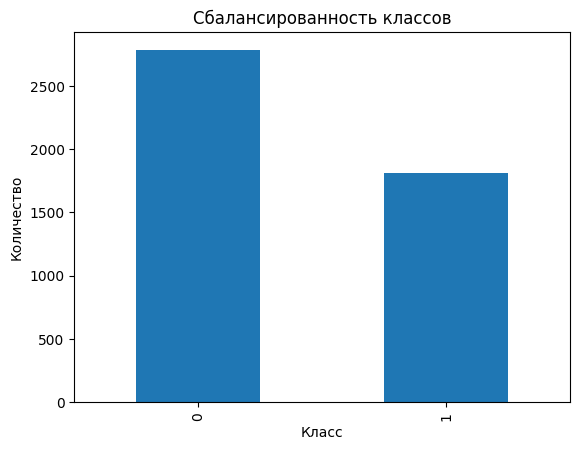

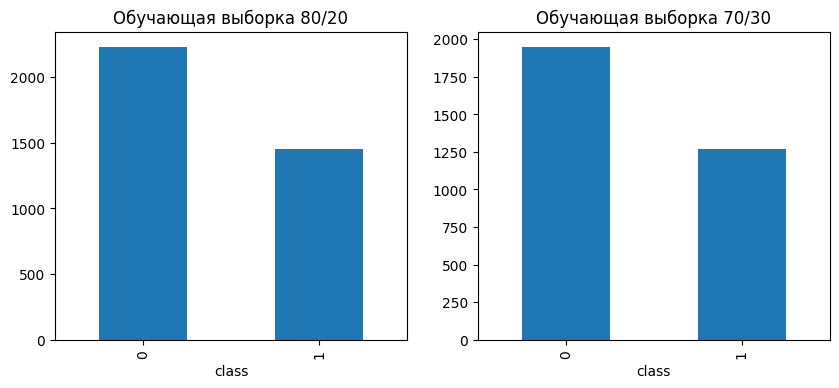

In [3]:
import matplotlib.pyplot as plt

## Визуализация сбалансированности классов
# Визуализация распределения классов
class_counts = spam_df['class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Сбалансированность классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

## Визуализация разбиения на обучающую и тестовую выборки
# Создание фигуры с двумя подплотами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Визуализация обучающих выборок
train_set_80_20['class'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Обучающая выборка 80/20')

train_set_70_30['class'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Обучающая выборка 70/30')

# Отображение фигуры
plt.show()

Вывод:

В датасете "Spambase.csv" наблюдается дисбаланс классов.
Мы сформировали обучающие и тестовые выборки в пропорциях 80/20 и 70/30, сохраняя стратификацию.

Следующий шаг:

Мы можем применить методы балансировки классов, такие как избыточная и уменьшающая выборка, либо использовать алгоритмы машинного обучения для классификации электронной почты как "обычной" или "спама".